Для хранения исходных и обработанных датасетов используется репозиторий на GoogleDrive

# **Разведочный анализ данных**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Создаём репозиторий. Имортируем необходимые библиотеки

In [ ]:
# Все библиотеки, необходимые для работы будут в этой ячейке
import numpy as np
import pandas as pd

# импорт matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import seaborn as sns

Датасет представляет собой два файла: X_bp (составляющая из базальтопластика) и Х_nup (составляющая из углепластика)

In [ ]:
# загрузка данных из X_bp. 
# удалим неинформативный столбец, содержащий индекс

X_bp = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dataset/X_bp.xlsx', index_col=0)
X_bp.shape      #__определим размерность файла


(1023, 10)

In [ ]:
X_bp.head()     #__отобразим первые пять строк датасета (по умолч.)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  
0                    220.0  
1                    220.0  
2                    220.0  
3                    220.0  
4                    220.0

In [ ]:
# загрузка данных из X_nup. 
# удалим неинформативный столбец, содержащий индекс

X_nup = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dataset/X_nup.xlsx', index_col=0)
X_nup.shape      #__определим размерность файла


(1040, 3)

In [ ]:
X_nup.head(1000)     #__отобразим первые пять строк датасета (по умолч.)

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0                     0     4.000000          57.000000
1                     0     4.000000          60.000000
2                     0     4.000000          70.000000
3                     0     5.000000          47.000000
4                     0     5.000000          57.000000
..                  ...          ...                ...
995                  90     6.756565          60.064019
996                  90     7.626517          45.148175
997                  90     5.652525          53.622746
998                  90     7.812506          62.702042
999                  90     4.843831          40.734359

[1000 rows x 3 columns]

X_bp содержит индекс, 10 признаков, 1023 строк

X_nup содержит индекс, 3 признака, 1040 строк

## **Объединение датасета по индексу**

 

**Тип объединения INNER**

Понимаем, что эти исходные датасеты имеют разную размерность. 
Задача собрать исходные данные файлы в единый набор данных. 

In [ ]:
# объединение датасетов
df = X_bp.join(X_nup, how='inner')
df.shape

(1023, 13)

Объединенный датасет содержит 13 признаков и 1023 строки

Часть данных удалена на начальном этапе исследования из X_nup

Столбец **Угол нашивки, град** показал всего два уникальных значения. Это **категориальный признак**. 

Применим бинарное кодирование: приведём столбец к значениям 0 и 1. 

*Если не приводить категориальный признак к числовому со значениями 0 и 1, это может повлиять на корректность вычисления описательной статистики, выбора и обучения модели, написания нейросети, так как большинство алгоритмов машинного обучения не могут работать с категориальными признаками напрямую.*

In [ ]:
df = df.replace({'Угол нашивки, град': {0.0 : 0, 90.0 : 1}})
df['Угол нашивки, град'] = df['Угол нашивки, град'].astype(int)

In [ ]:
df['Угол нашивки, град'][df['Угол нашивки, град'] == 0.0].count()

520

In [ ]:
#проверила в черновике заранее кол-во элементов 'Угол нашивки, град' = 0. Кол-во не изменилось после преобразования

In [ ]:
# отобразим начальные и конечные строки объединенного датасета
df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                       3000.000000               220.000000   
1                       3000.000000               220.000000   
2                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 

In [ ]:
# получим информацию о признаках
# типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

Двенадцать признаков имеют тип float64. Угол нашивки имеет тип int64

Признаков с типом "object", строковых нет

In [ ]:
# проверка на пропуски
# датасет получен подготовленный. Пропуски не должны быть найдены
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [ ]:
#поиск дубликатов в датасете
df.duplicated().sum()

0

In [ ]:
# получим количество уникальных значений в каждом столбце
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [ ]:
# сохраним объединенный датасет
df.to_excel('/content/drive/MyDrive/Colab Notebooks/dataset/X_INNER.xlsx', index=0)

# **Описательная статистика данных**

In [ ]:
df.describe().T.style\
    .set_table_styles([{'selector': 'th.col_heading',
                        'props': [('text-align', 'left')]}])\
    .set_properties(**{'text-align': 'left'})\
    .format('{:.4f}')
 # описательная статистика датасета

*   **count** - количество
*   **mean** - среднее значение
*   **std** - стандартное отклонение
*   **min** - минимум
*   **25%** - верхнее значение первого квартиля
*   **50%** - медиана (2-й квартиль)
*  **75%** - верхнее значение третьего квартиля
*  **max** - максимум




**Получим гистограммы распределения каждой из переменной**

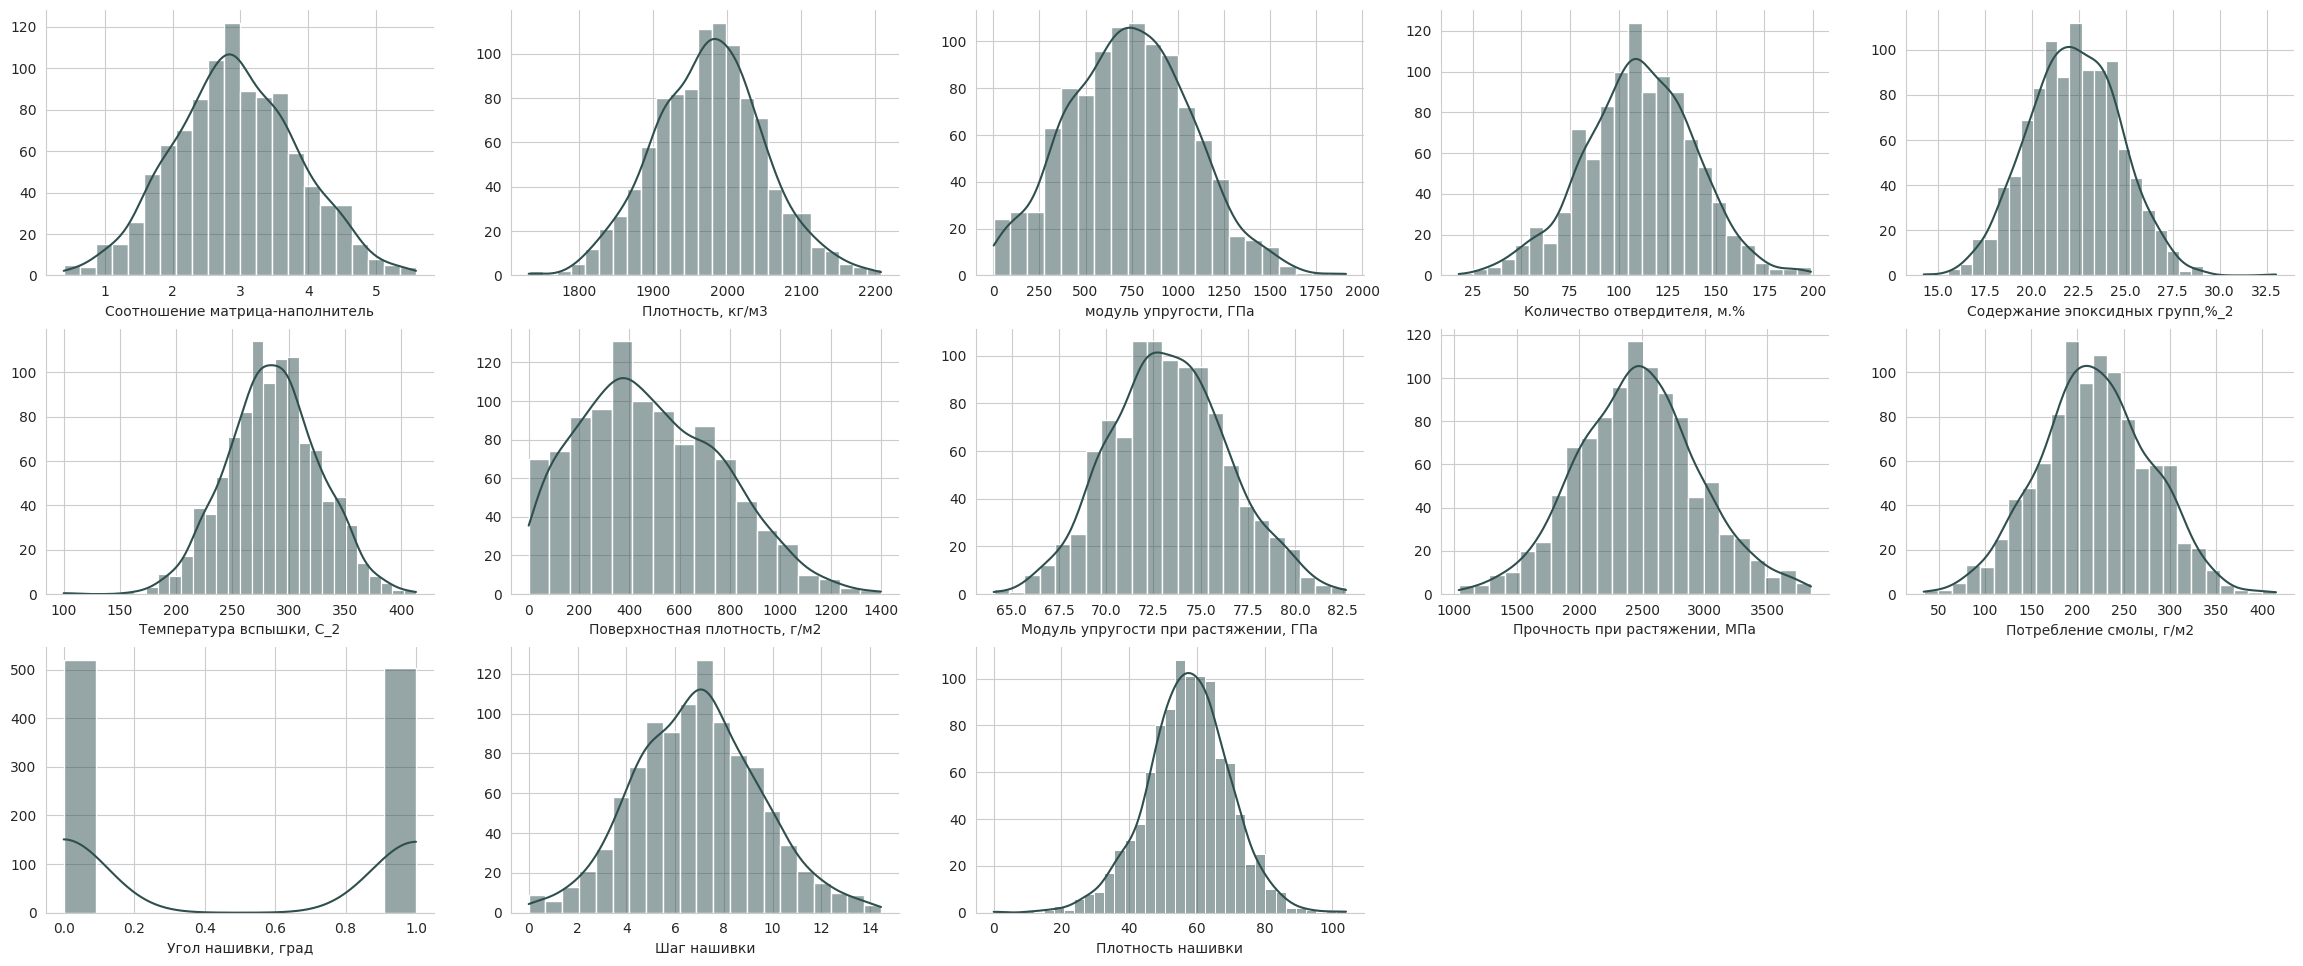

In [ ]:
c = 1 #__инициализация plot counter в цикле for
plt.figure(figsize = (29,20))
for col in df.columns:
  plt.subplot(5, 5, c)
  sns.histplot(data = df[col], kde=True, color = "#2F4F4F")
  sns.despine()
  plt.ylabel(None)
  c += 1

Все признаки, кроме "Угол нашивки, град" стремятся к нормальному распределению


---


Гистограммы, исключая для угла нашивки, у которого 2 значения показывают явные выбросы

**Получим боксплоты (ящики с усами)**

Диаграмма "ящик с усами" показывает распределение данных по квартилям, выделяя их выбросы

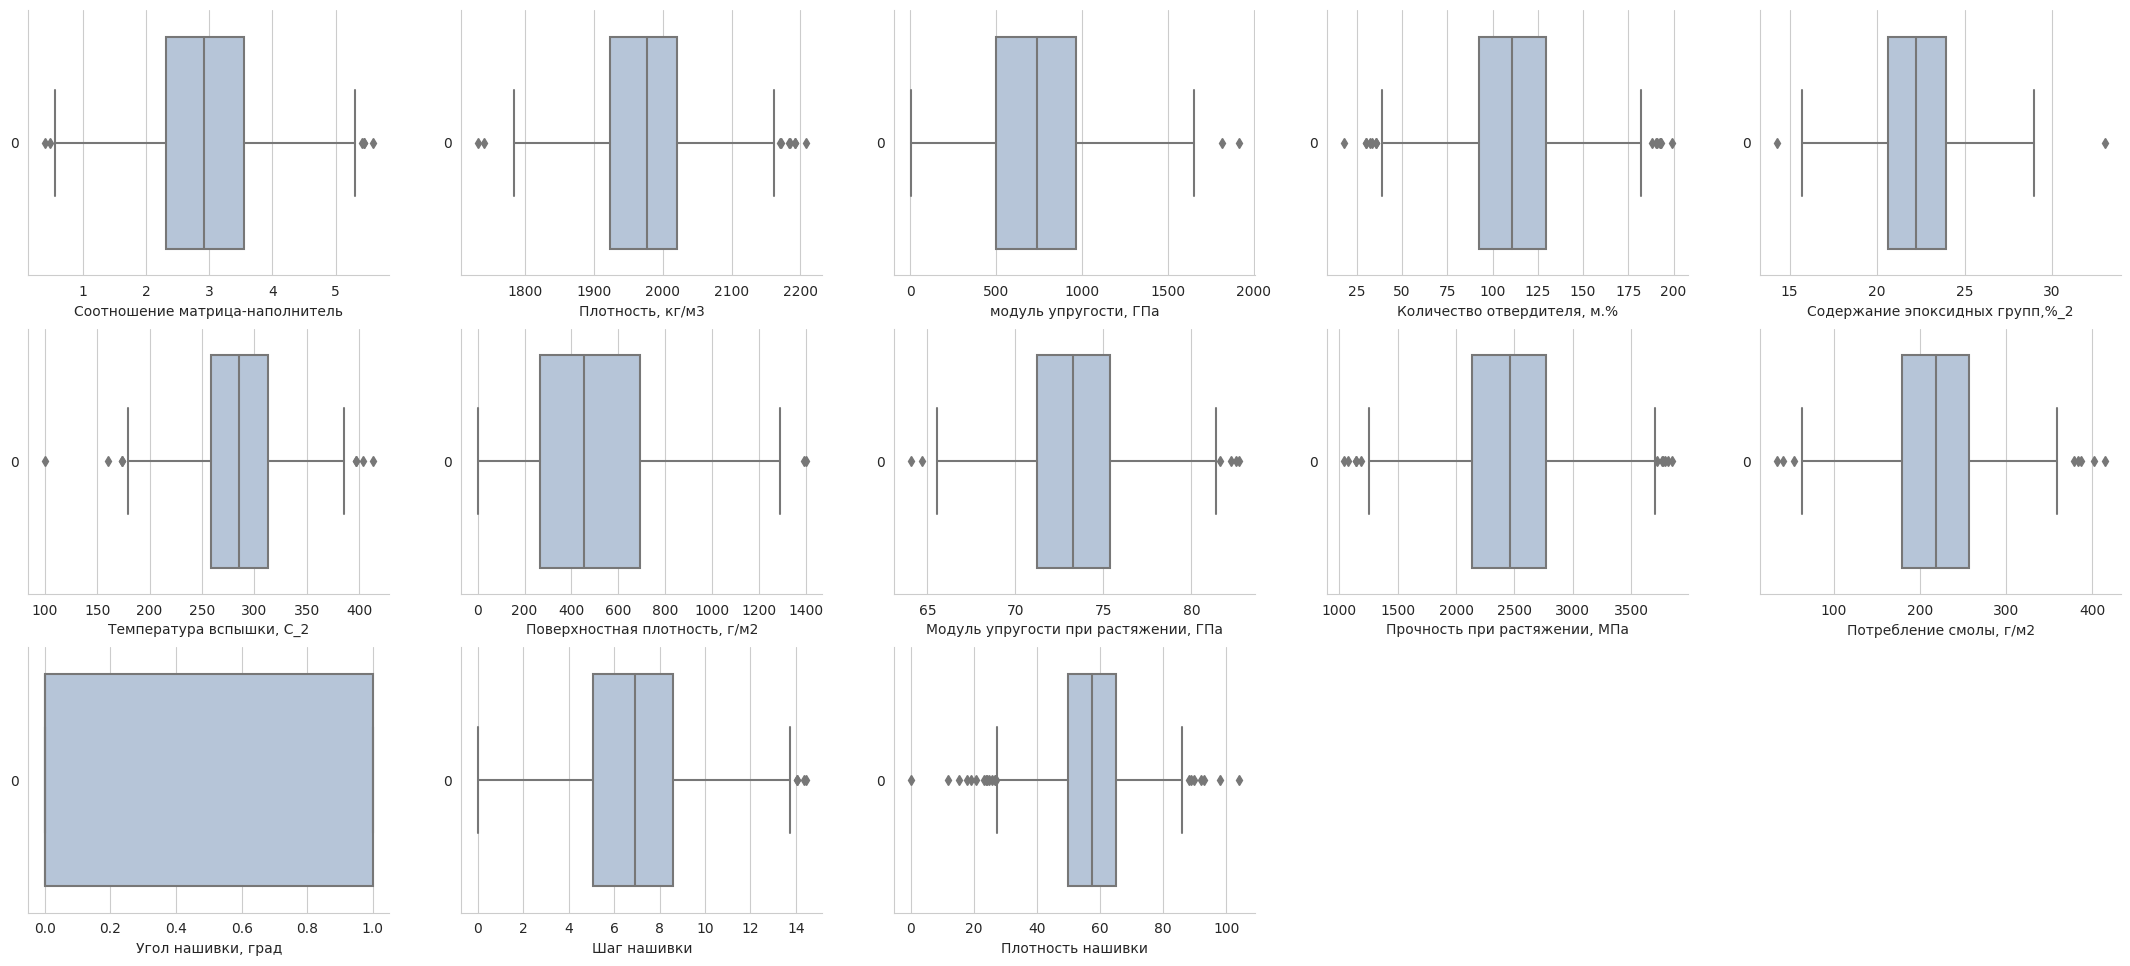

In [ ]:
c = 1 # инициализация plot counter в цикле for
plt.figure(figsize = (27,20))
sns.set_style('whitegrid')

for col in df.columns:
  plt.subplot(5, 5, c)
  sns.boxplot (data = df[col], orient="h", color = "#B0C4DE")
  plt.xlabel(col)
  sns.despine()    
  c += 1

Боксплоты показали наличие выбросов

**Матрица корреляции**

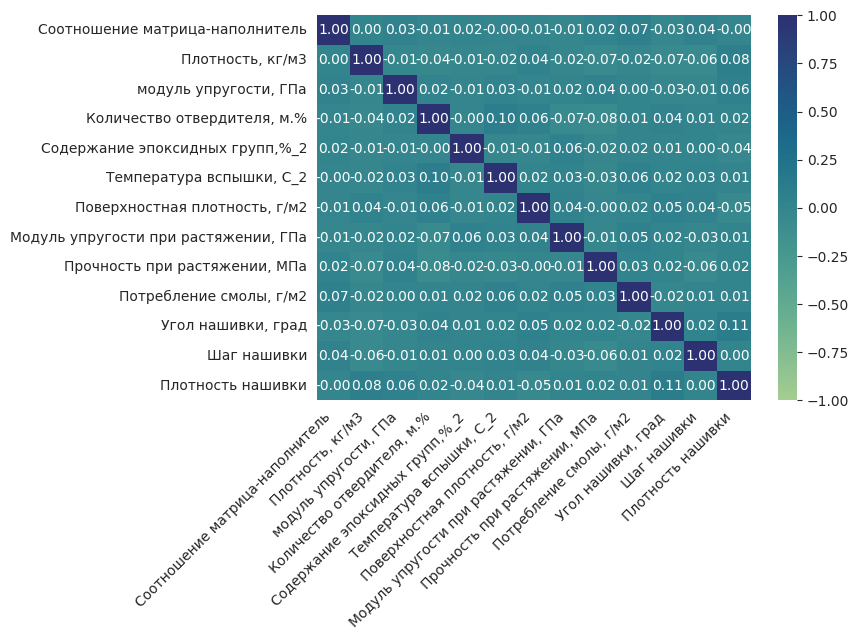

In [ ]:
# Построим тепловую карту, матрицу корреляции
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='crest', ax=ax)
plt.xticks(rotation = 45, ha='right')
plt.show()

Коэффициенты корреляции близки к значению 0. Не видим линейной зависимости между признаками

> Посмотрим, как ведут себя данные, представленные в виде попарных графиков рассеяния





**Попарные графики рассеяния**

<Figure size 640x480 with 0 Axes>

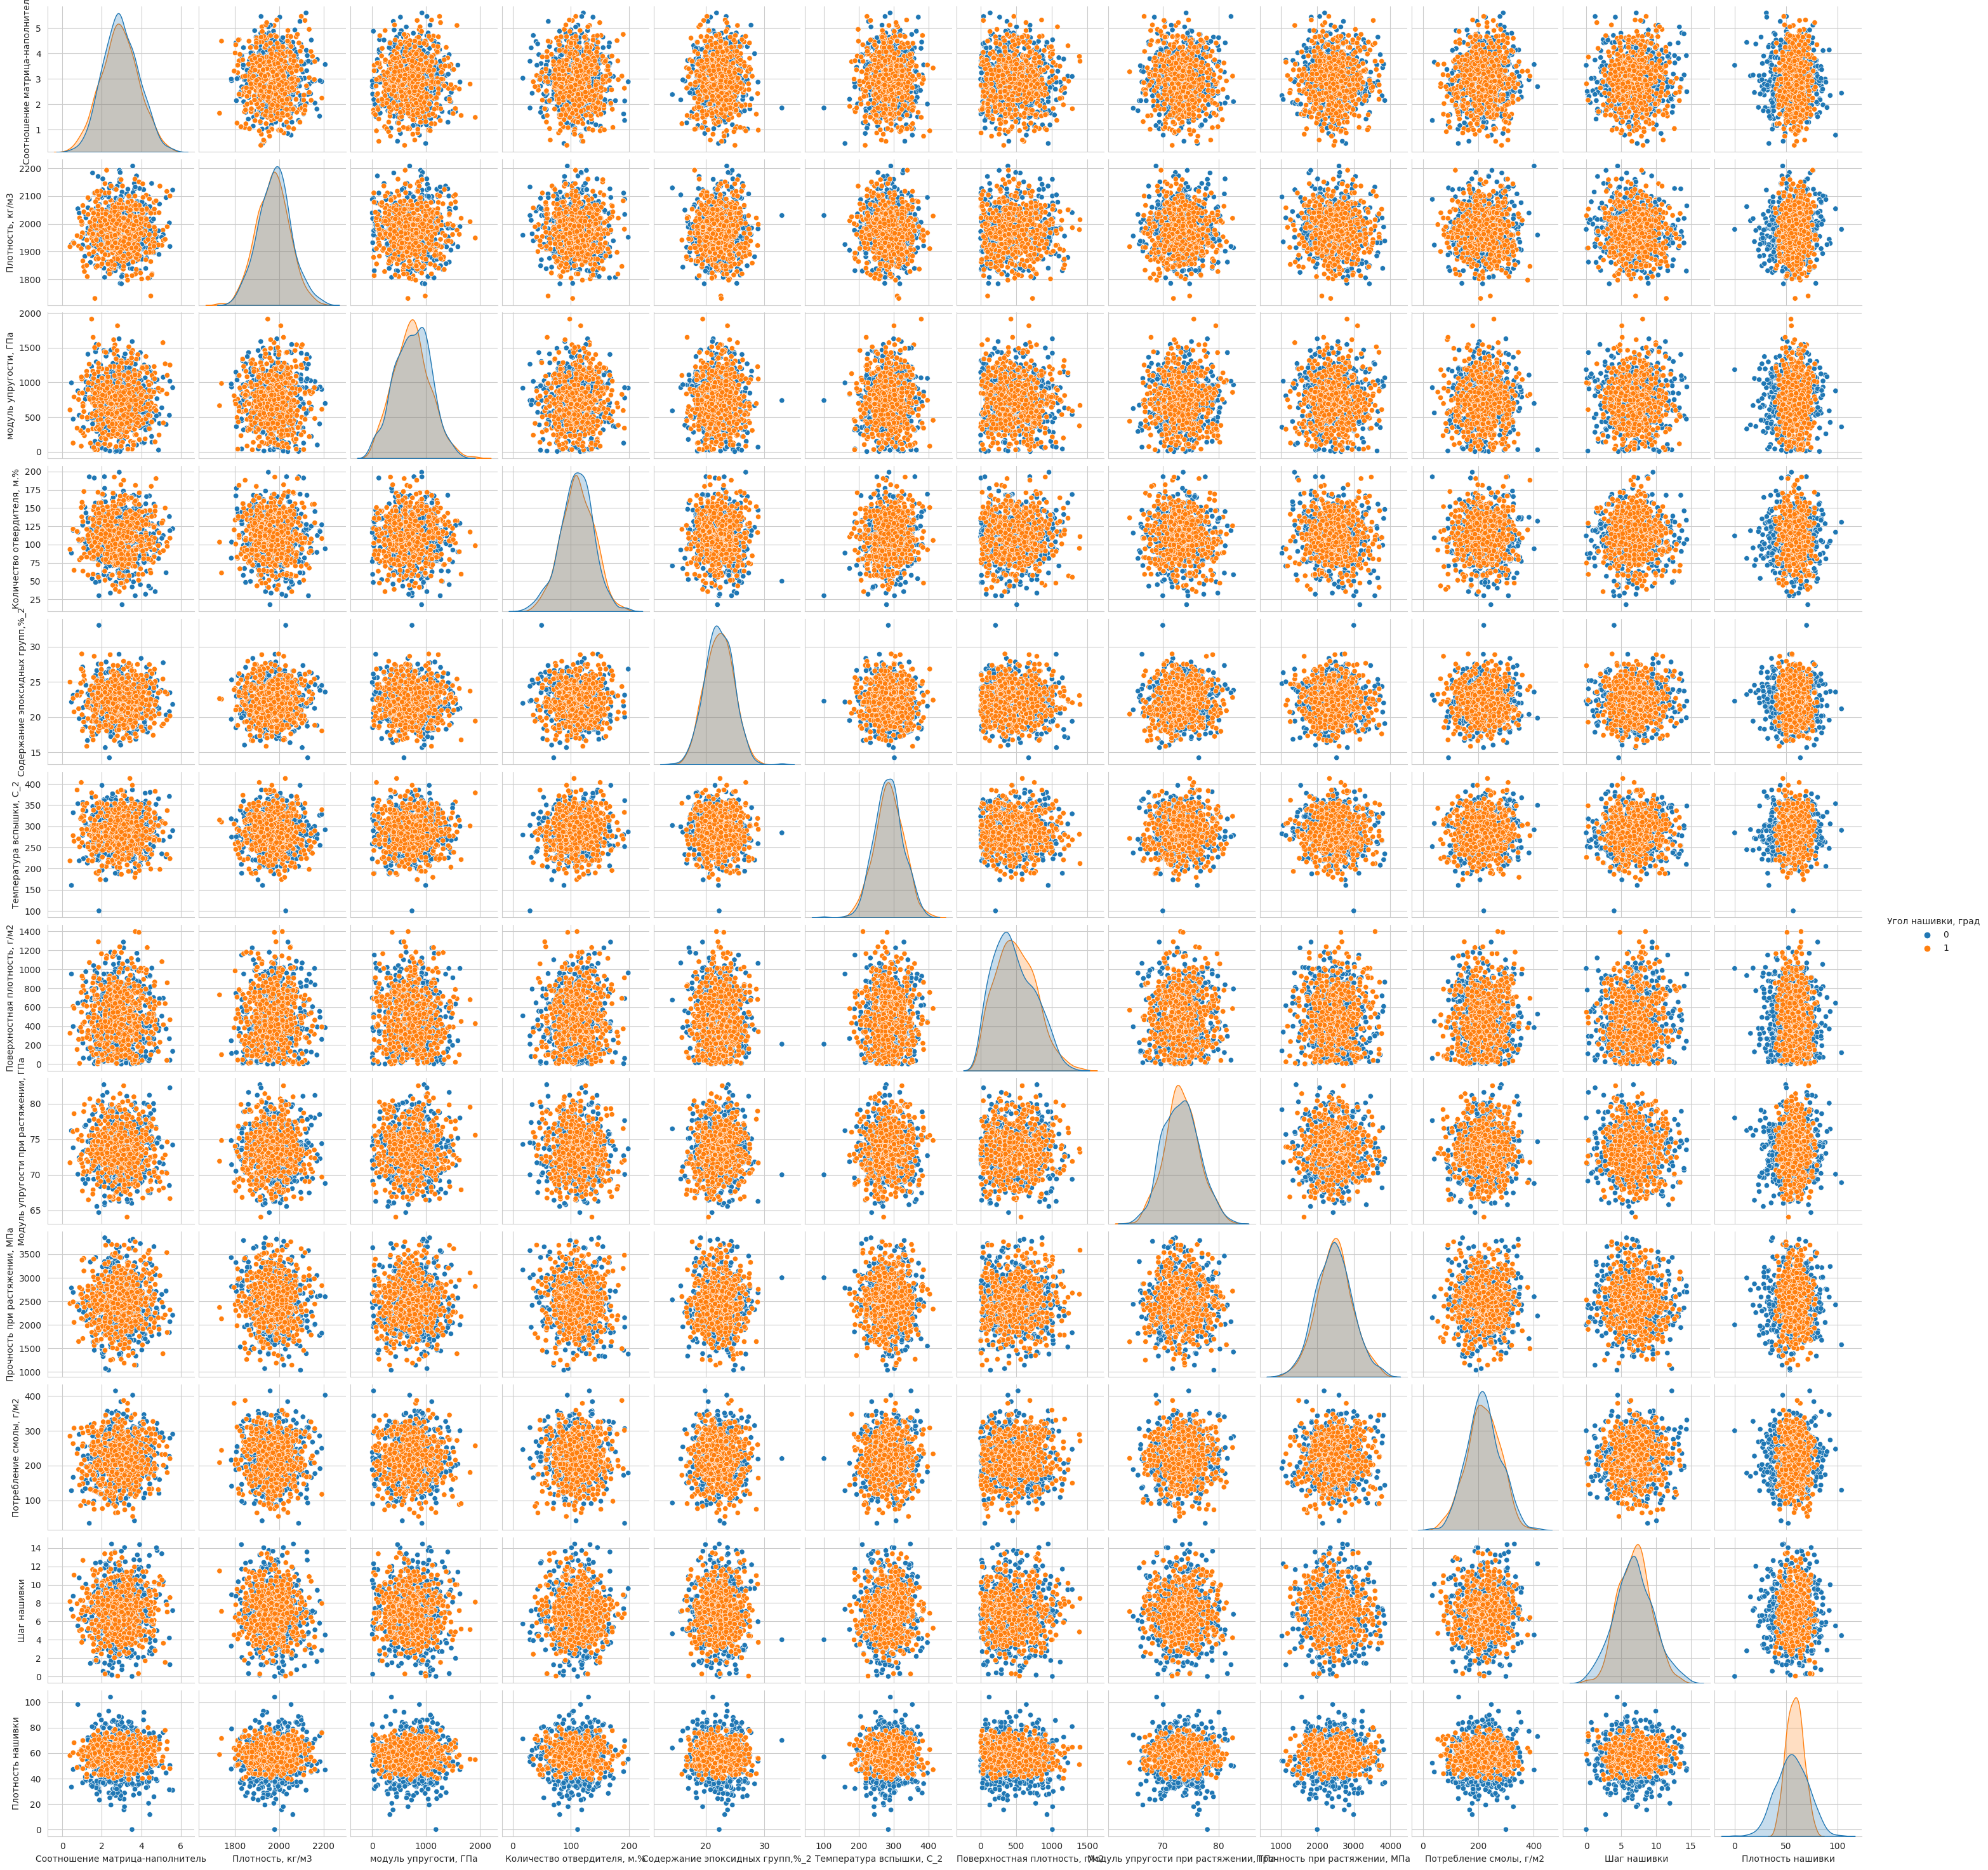

In [ ]:
#попарные графики рассеяния точек получим с пом. инструментов библиотеки Matplotlib Seaborn 
sns.set_style('whitegrid')
sns.despine()
sns.pairplot(df, hue = 'Угол нашивки, град') #__c объединением по указ.столбцу через hue нагляднее, разные цвета лучше отр. явные выбросы


Матрица диаграмм попарного рассеяния не отражает какой-либо зависимости и взаимосвязи данных

Некоторые точки отстоят далеко от общего облака, наблюдаются выбросы


# **Поиск выбросов. Очистка данных**

In [ ]:
X_INNER = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dataset/X_INNER.xlsx')

In [ ]:
df = X_INNER

**Поиск выбросов данных**

**Применим методы: 3-х сигм и межквартильных расстояний. Сравним, как они отработают на нашем наборе данных**


Соотношение матрица-наполнитель: 3s=0 iq=6


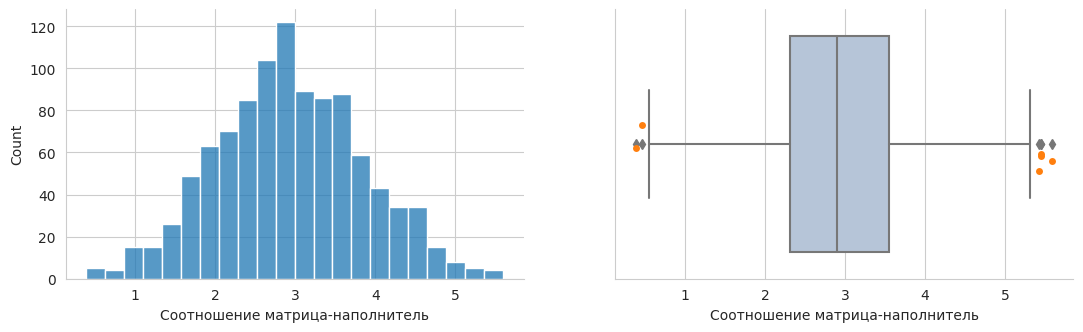


Плотность, кг/м3: 3s=3 iq=9


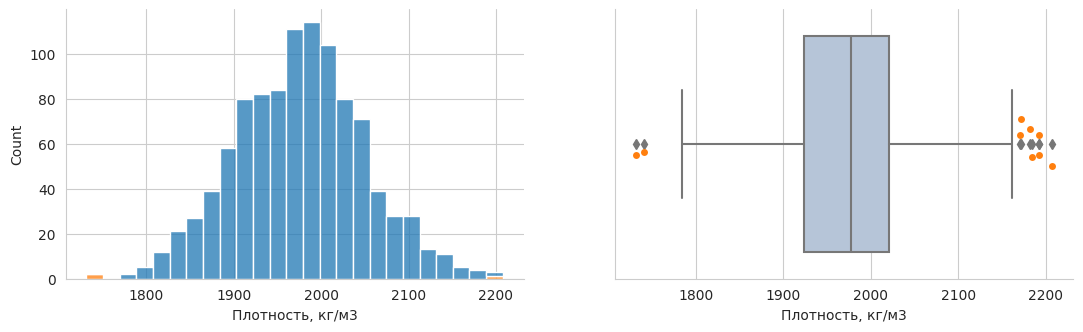


модуль упругости, ГПа: 3s=2 iq=2


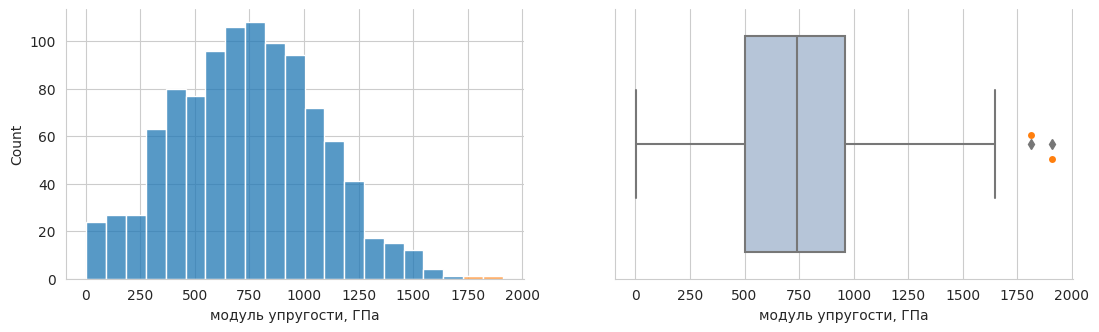


Количество отвердителя, м.%: 3s=2 iq=14


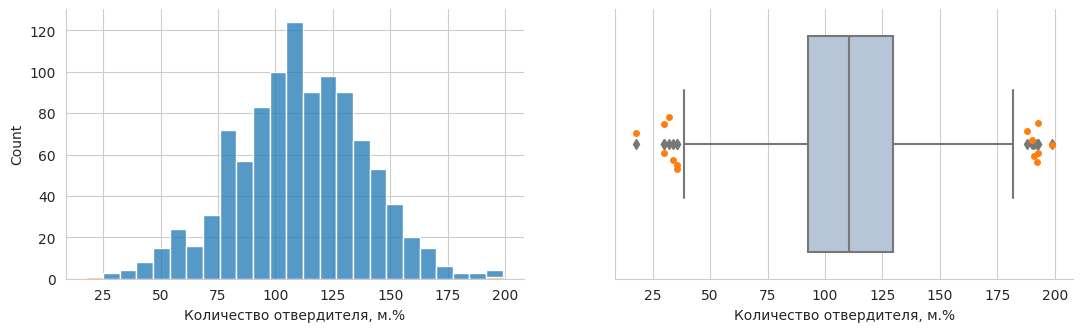


Содержание эпоксидных групп,%_2: 3s=2 iq=2


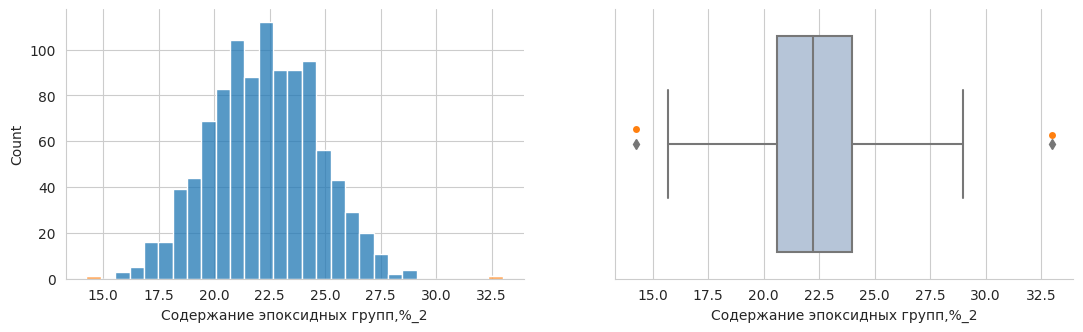


Температура вспышки, С_2: 3s=3 iq=8


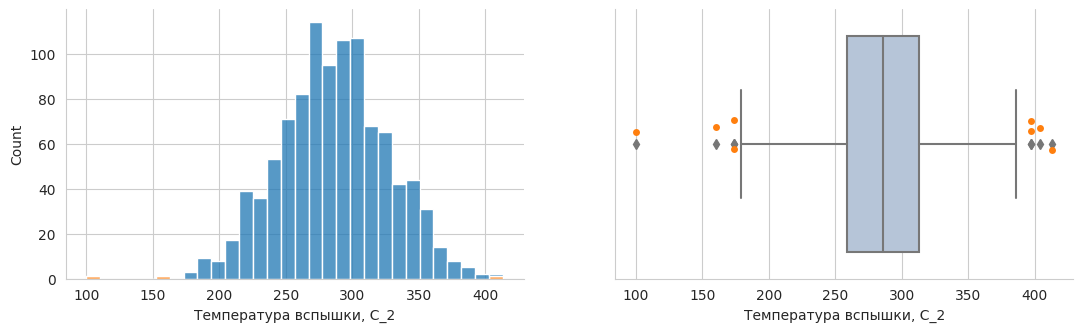


Поверхностная плотность, г/м2: 3s=2 iq=2


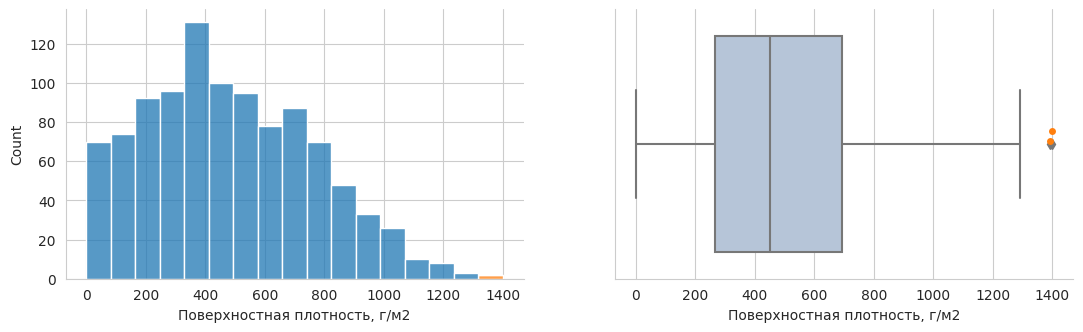


Модуль упругости при растяжении, ГПа: 3s=0 iq=6


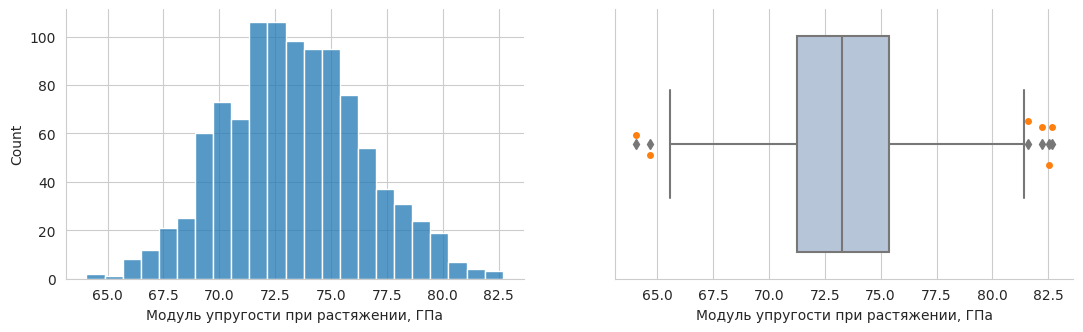


Прочность при растяжении, МПа: 3s=0 iq=11


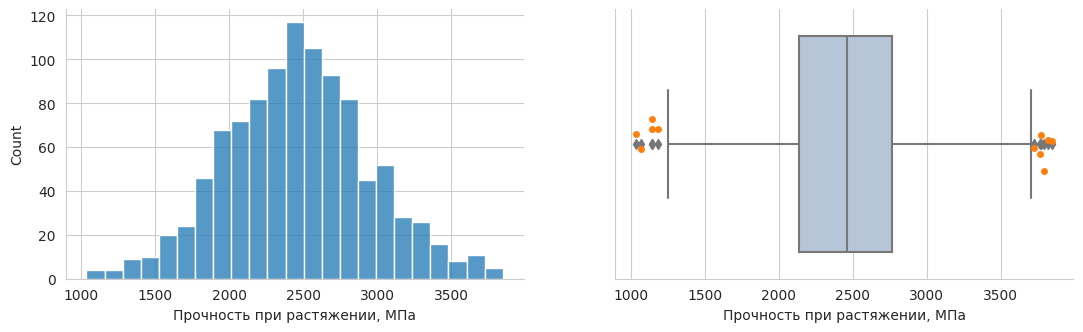


Потребление смолы, г/м2: 3s=3 iq=8


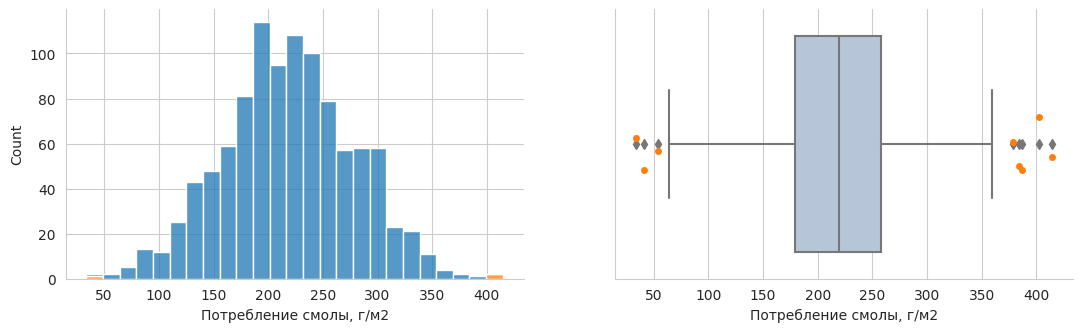


Угол нашивки, град: 3s=0 iq=0


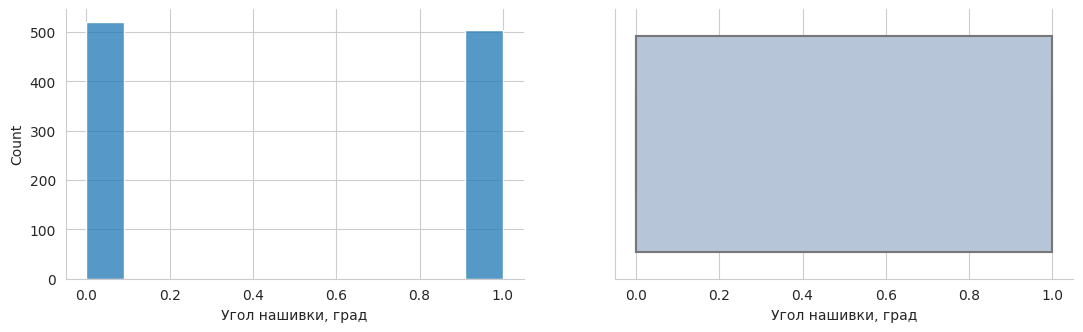


Шаг нашивки: 3s=0 iq=4


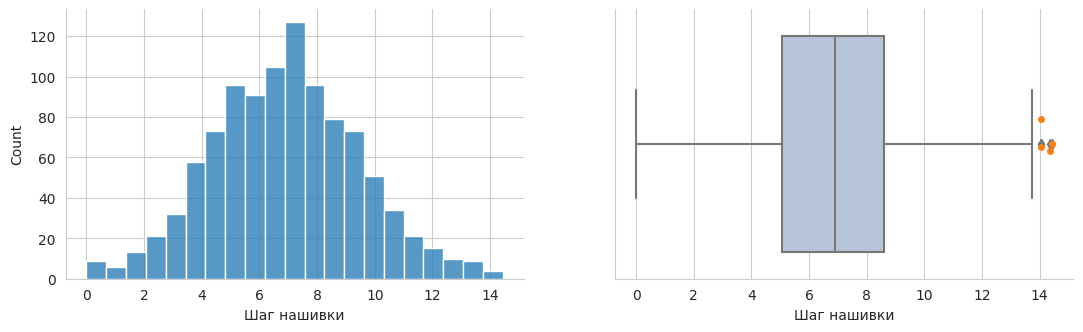


Плотность нашивки: 3s=7 iq=21


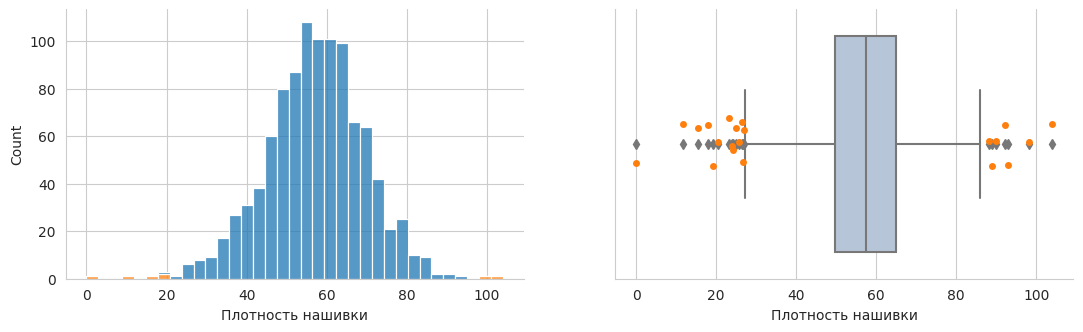

In [ ]:
count_iq = 0 #__кол-во выбросов методом межквартильных расст.-й
count_3s = 0 #__записывается кол-во выбросов методом 3-х сигм
for column in df:
    d = df.loc[:, [column]]
    # методом 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()
    
    # методом межквартильных расстояний
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    count_iq += d['iq'].sum()

    print('')
    print('{}: 3s={} iq={}'.format(column, d['3s'].sum(), d['iq'].sum()))
    fig, axes = plt.subplots(1, 2, figsize=(13, 3.5))
    sns.histplot(data=d, x=column, hue='3s', multiple='stack', legend=False, ax=axes[0])
    sns.boxplot(data=d, x=column, color = "#B0C4DE", ax=axes[1])
    #sns.stripplot(data=d[d['iq']==False], x=column, ax=axes[1])
    sns.stripplot(data=d[d['iq']==True], x=column, color='tab:orange', jitter = True, ax=axes[1])
    sns.set_style('whitegrid')
    sns.despine()
    plt.show()

In [ ]:
print('Метод 3-х сигм, найдено выбросов:', count_3s)
print('Метод межквартильных расстояний, найдено выбросов:', count_iq)

Метод 3-х сигм, найдено выбросов: 24
Метод межквартильных расстояний, найдено выбросов: 93


Можно применить два метода: Метод 3-сигм и метод межквартильного расстояния (процентили). Вторым методом было найдено больше выбросов. Но я замучалась с этим методом: проверять трижды и удалять большое количество данных. 

*Метод трёх сигм не гарантирует, что все выбросы будут удалены, так как есть вероятность того, что выбросы могут находиться внутри границ трёх стандартных отклонений.*

Большинство признаков распределены нормально.
Всё же, во избежании потерь, применю метод 3-сигм

In [ ]:
# Допустим, методом процентилей это выглядело бы так

'''def find_outliers_iqr(df, column):
  lower, upper = np.percentile(df[column], [25, 75]) # определяем первый и третий квартили
  iqr = upper - lower # определяем межквартильный интервал
  lower_bound = lower - (iqr * 1.5) # определяем нижнюю границу выбросов
  upper_bound = upper + (iqr * 1.5) # определяем верхнюю границу выбросов
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)] # находим выбросы
  return outliers'''

In [ ]:
# Применяем функцию для каждого столбца с числовыми значениями, где нужно убрать выбросы
'''outliers = pd.DataFrame()
for col in df.select_dtypes(include=[np.number]):
    outliers = pd.concat([outliers, find_outliers_iqr(df, col)], axis=0'''

In [ ]:
# Удалить выбросы методом 3-х сигм
outliers = pd.DataFrame(index=df.index)
for column in df:
    zscore = (df[column] - df[column].mean()) / df[column].std()
    outliers[column] = (zscore.abs() > 3)
df = df[outliers.sum(axis=1)==0]
df.shape

(1000, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1000 non-null   float64
 1   Плотность, кг/м3                      1000 non-null   float64
 2   модуль упругости, ГПа                 1000 non-null   float64
 3   Количество отвердителя, м.%           1000 non-null   float64
 4   Содержание эпоксидных групп,%_2       1000 non-null   float64
 5   Температура вспышки, С_2              1000 non-null   float64
 6   Поверхностная плотность, г/м2         1000 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1000 non-null   float64
 8   Прочность при растяжении, МПа         1000 non-null   float64
 9   Потребление смолы, г/м2               1000 non-null   float64
 10  Угол нашивки, град                    1000 non-null   int64  
 11  Шаг нашивки      

# **Повторный разведочный анализ чистых данных**

In [ ]:
df.corr() #кореляции параметров

Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                              1.000000   
Плотность, кг/м3                                             0.004992   
модуль упругости, ГПа                                        0.043882   
Количество отвердителя, м.%                                 -0.004923   
Содержание эпоксидных групп,%_2                              0.022868   
Температура вспышки, С_2                                    -0.010440   
Поверхностная плотность, г/м2                               -0.013341   
Модуль упругости при растяжении, ГПа                        -0.012219   
Прочность при растяжении, МПа                                0.025619   
Потребление смолы, г/м2                                      0.061553   
Угол нашивки, град                                          -0.040429   
Шаг нашивки                                                  0.043621   
Плотность нашивки                                            0.009227   

                                      Плотность, кг/м3  модуль упругости, ГПа  \
Соотношение матрица-наполнитель               0.004992               0.043882   
Плотность, кг/м3                              1.000000              -0.004677   
модуль упругости, ГПа                        -0.004677               1.000000   
Количество отвердителя, м.%                  -0.039992               0.027359   
Содержание эпоксидных групп,%_2              -0.006781              -0.010107   
Температура вспышки, С_2                     -0.016638               0.030221   
Поверхностная плотность, г/м2                 0.044108              -0.003296   
Модуль упругости при растяжении, ГПа         -0.018448               0.015797   
Прочность при растяжении, МПа                -0.079407               0.037033   
Потребление смолы, г/м2                      -0.017481               0.007556   
Угол нашивки, град                           -0.055865              -0.032754   
Шаг нашивки                                  -0.047734              -0.006022   
Плотность нашивки                             0.094659               0.067535   

                                      Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                         -0.004923   
Плотность, кг/м3                                        -0.039992   
модуль упругости, ГПа                                    0.027359   
Количество отвердителя, м.%                              1.000000   
Содержание эпоксидных групп,%_2                         -0.001135   
Температура вспышки, С_2                                 0.086055   
Поверхностная плотность, г/м2                            0.055783   
Модуль упругости при растяжении, ГПа                    -0.076542   
Прочность при растяжении, МПа                           -0.055299   
Потребление смолы, г/м2                                  0.019433   
Угол нашивки, град                                       0.037052   
Шаг нашивки                                             -0.000902   
Плотность нашивки                                        0.013256   

                                      Содержание эпоксидных групп,%_2  \
Соотношение матрица-наполнитель                              0.022868   
Плотность, кг/м3                                            -0.006781   
модуль упругости, ГПа                                       -0.010107   
Количество отвердителя, м.%                                 -0.001135   
Содержание эпоксидных групп,%_2                              1.000000   
Температура вспышки, С_2                                    -0.006799   
Поверхностная плотность, г/м2                               -0.008031   
Модуль упругости при растяжении, ГПа                         0.069029   
Прочность при растяжении, МПа                               -0.027217   
Потребление смолы, г/м2                                      0.015326   
Угол нашивки, град                                           0.012099   
Шаг нашивки                          

In [ ]:
# средние и медианные знчения датасета после очистки выбросов 
mean_and_50 = df.describe()
mean_and_50.loc[['mean', '50%']]

Соотношение матрица-наполнитель  Плотность, кг/м3  \
mean                         2.936299       1975.402478   
50%                          2.908811       1977.321002   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
mean             738.675486                   110.821904   
50%              741.148111                   110.652620   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
mean                        22.235549                285.957299   
50%                         22.221462                285.853960   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
mean                     479.855825                             73.318178   
50%                      450.869535                             73.230375   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
mean                    2464.864198               218.254011   
50%                     2456.394188               218.697660   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
mean               0.496     6.910600          57.276293  
50%                0.000     6.922196          57.471971

немного различаются, но близки. Наследующем шаге стандартизируем

In [ ]:
# проверка на пропуски
# датасет чистый
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [ ]:
#поиск дубликатов в датасете
df.duplicated().sum()

0

In [ ]:
# получим количество уникальных значений в каждом столбце
df.nunique()

Соотношение матрица-наполнитель         994
Плотность, кг/м3                        993
модуль упругости, ГПа                   999
Количество отвердителя, м.%             983
Содержание эпоксидных групп,%_2         983
Температура вспышки, С_2                982
Поверхностная плотность, г/м2           984
Модуль упругости при растяжении, ГПа    984
Прочность при растяжении, МПа           984
Потребление смолы, г/м2                 983
Угол нашивки, град                        2
Шаг нашивки                             968
Плотность нашивки                       967
dtype: int64

Ну и хорошо, сохраняем подготовленный для следующего шага датасет.

А также сделаем три его копии для трех разных задач

In [ ]:
# сохраним чистый подготовленный датасет
df.to_excel('/content/drive/MyDrive/Colab Notebooks/dataset/X_CLEAR.xlsx', index=0)

сделаем также копии исходного подготовленного датасета. в следующих заданиях будем работать с ними